## Error Analysis for Prophet:
In this Part We are going to explore and evaluate the facebook prophet forecasting on the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Defining Metrics:

1. Normalaized root mean square error: NRMSE
<img src = "RMSE1.jpg" style="width:300px ; height: 100px"/>
<img src = "nrmse.png" style="width: 200px; height:100px "/>
Where N ==> number of samples, yhate ==> the Mean value

2. Mean Absolute Percentage Error: MAPE
<img src = "MAPE_Python.png" style="width:300px ; height: 100px"/>
Where: At==> is the Actual Value, Ft ==> is the predicted value, N ==> umber of samples

In [2]:
def nrmse(df_p):
    """
    function to calculate the normalized root mea sqaure error
    """
    return np.sqrt((df_p["error"]**2).sum() / df_p.shape[0])/df_p["y"].mean()
def mape(df_p):
    """
    function to provide the mean absolute percentage error
    """
    return np.absolute(df_p["error"] / df_p["y"]).sum()/ df_p.shape[0]

In [45]:
#Reading prophetpredictions file
df = pd.read_csv("prophet_predictions_50.csv", parse_dates = ["ds"])

In [46]:
#Checking for Null Values
df.isna().sum()

y        0
yhat     0
error    0
ds       0
grid     0
dtype: int64

### Visualizing prediction:

In [47]:
#Grouping Data by grid sqaure
grouped_day = df.groupby("grid") 

In [48]:
#Getting all grids:
grids = list(grouped_day.groups.keys())

In [49]:
#Getting the data of a random grid
random_grid = np.random.choice(grids)
grid_df_day = grouped_day.get_group(random_grid)

In [50]:
grid_df_day

,y,yhat,error,ds,grid
137088,781.192948,1250.132985,-468.940036,2013-12-01 00:00:00,5258
137089,912.536519,1397.057743,-484.521225,2013-12-01 00:10:00,5258
137090,1308.446118,1511.691377,-203.245259,2013-12-01 00:20:00,5258
137091,1055.805076,1618.011833,-562.206756,2013-12-01 00:30:00,5258
137092,1324.980797,1725.615146,-400.634349,2013-12-01 00:40:00,5258
...,...,...,...,...,...
154219,925.535544,745.175597,180.359947,2013-12-20 23:10:00,5258
154220,769.307634,742.438008,26.869626,2013-12-20 23:20:00,5258
154221,769.111522,767.888817,1.222705,2013-12-20 23:30:00,5258
154222,741.301673,756.688680,-15.387006,2013-12-20 23:40:00,5258


In [51]:
random_grid1 = np.random.choice(grids)
grid1_df_day = grouped_day.get_group(random_grid1).groupby(["ds"])["y", "yhat"].mean()

<ipython-input-51-49ef4b9ac465>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grid1_df_day = grouped_day.get_group(random_grid1).groupby(["ds"])["y", "yhat"].mean()


In [52]:
grid1_df_day

,y,yhat
ds,,
2013-12-01 00:00:00,462.080786,827.263069
2013-12-01 00:10:00,441.252083,853.908136
2013-12-01 00:20:00,397.272876,886.797501
2013-12-01 00:30:00,449.219264,877.785810
2013-12-01 00:40:00,416.759475,898.474819
...,...,...
2013-12-20 23:10:00,411.769701,617.775066
2013-12-20 23:20:00,374.881786,609.561078
2013-12-20 23:30:00,427.021052,617.219863


<ipython-input-69-a45478b077ab>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grid1_df_day = grouped_day.get_group(grid).groupby(["ds"])["y", "yhat"].mean()


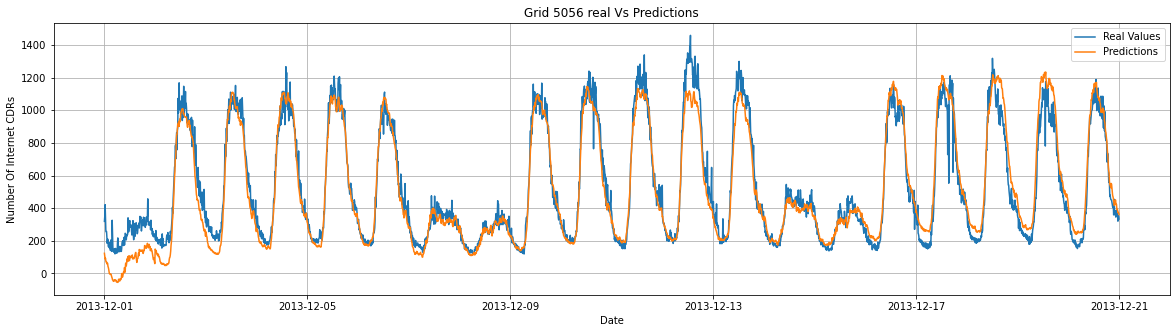

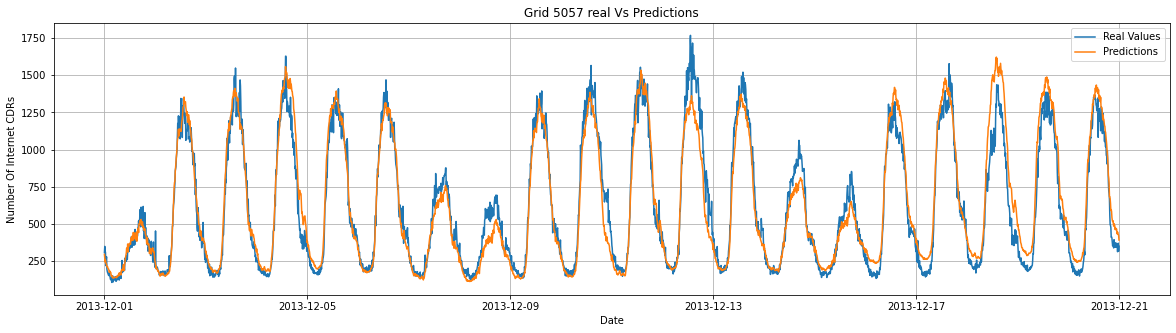

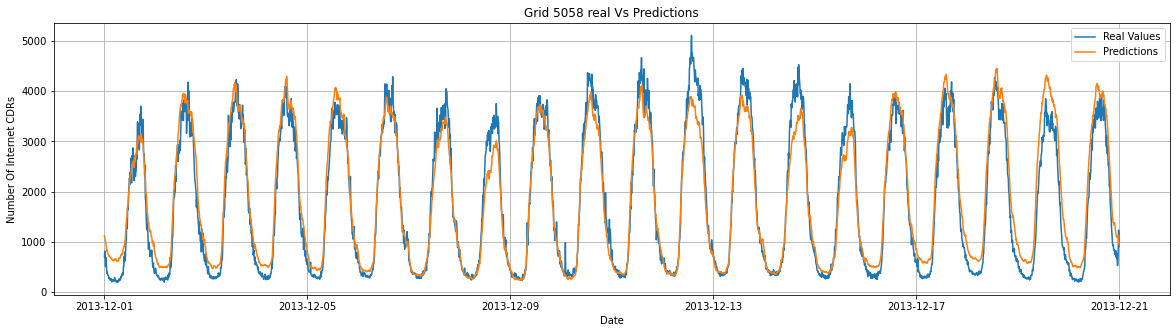

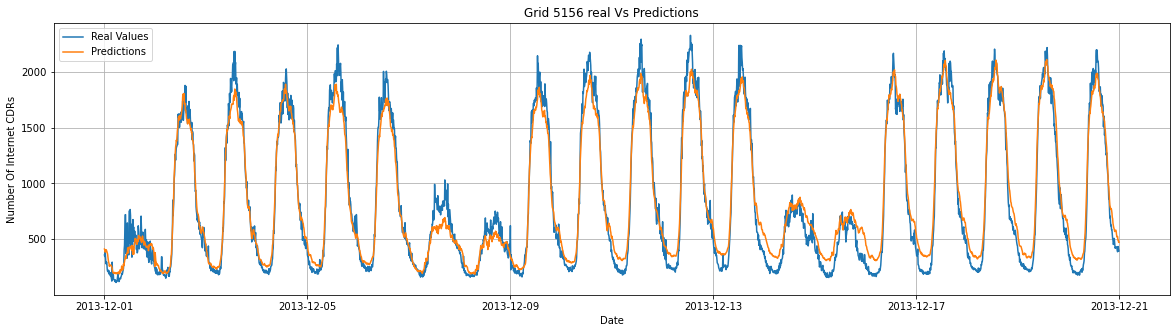

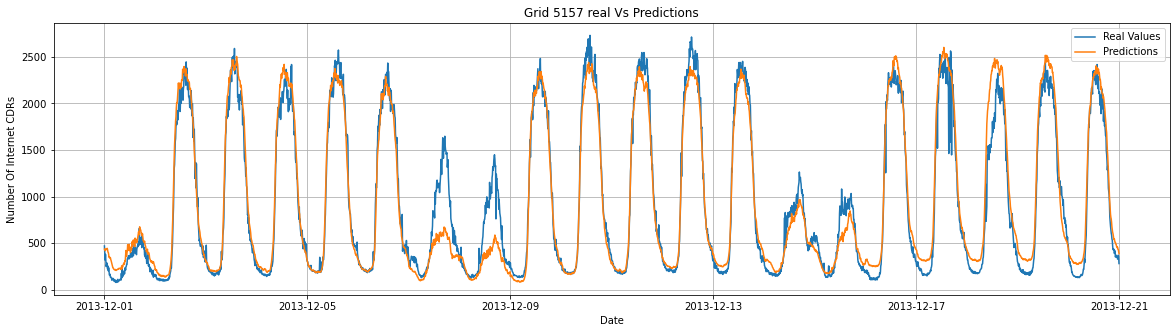

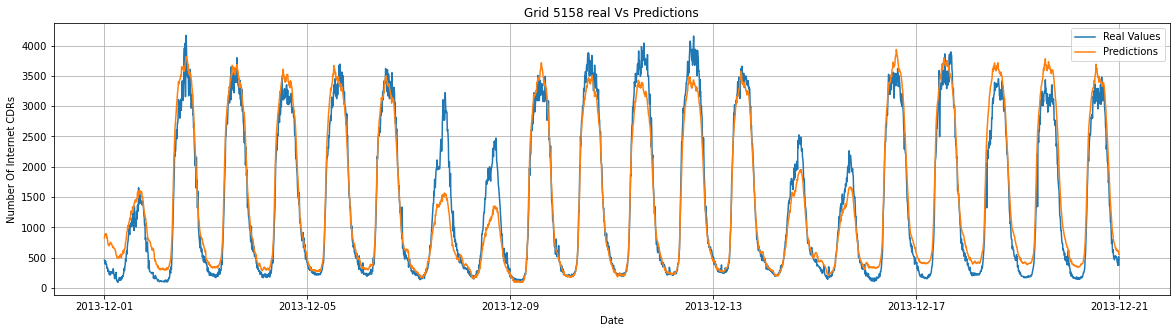

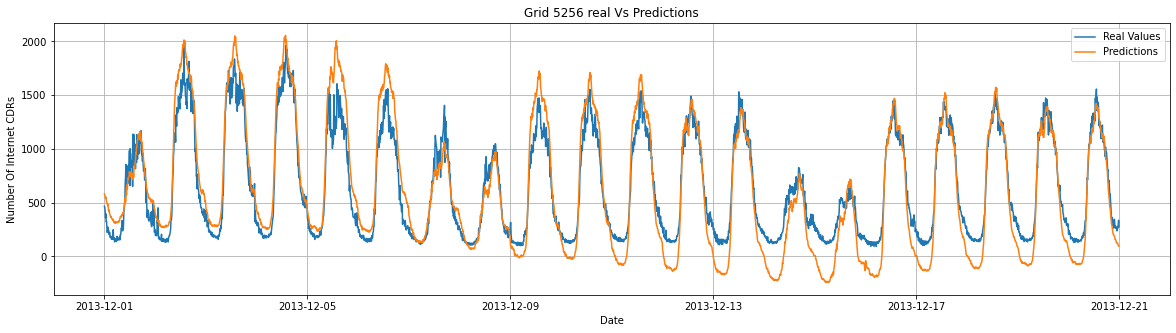

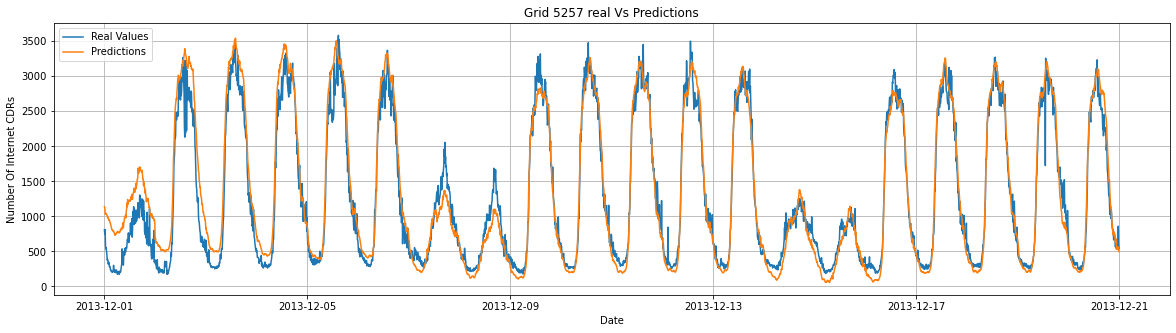

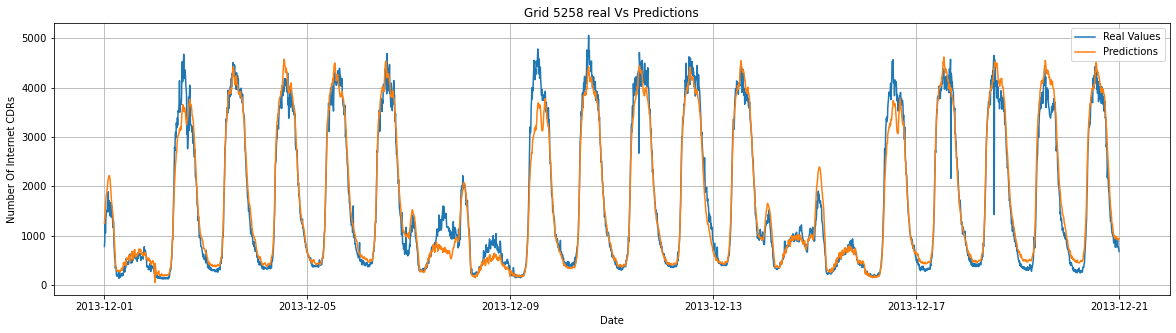

In [69]:
#Plotting predictions for grids:
for grid in grids:
    grid1_df_day = grouped_day.get_group(grid).groupby(["ds"])["y", "yhat"].mean()
    plt.figure(figsize = (20,5))
    plt.title("Grid {} real Vs Predictions".format(grid))
    plt.plot(grid1_df_day["y"], label = "Real Values")
    plt.plot(grid1_df_day["yhat"], label = "Predictions")
    plt.legend()
    plt.xlabel("Date")
    plt.ylabel("Number Of Internet CDRs")
    plt.grid()
    plt.show();

The model has captured the trend and seasonlaity well and holidays also for each grid, which we expect a low error.

### Loading Error Files:

In [55]:
day_errors  = pd.read_csv("error_day50.csv")
day2_errors = pd.read_csv("error_2day50.csv")
day3_errors = pd.read_csv("error_3day50.csv")
day7_errors = pd.read_csv("error_week50.csv")

### Preprocessing the errors data:

In [56]:

day_errors.columns  = ["NRMSE", "MAPE", "grid"]
day_errors = day_errors[1:]
day2_errors.columns  = ["NRMSE", "MAPE", "grid"]
day2_errors = day2_errors[1:]
day3_errors.columns  = ["NRMSE", "MAPE", "grid"]
day3_errors = day3_errors[1:]
day7_errors.columns  = ["NRMSE", "MAPE", "grid"]
day7_errors= day7_errors[1:]

In [57]:
day_errors["NRMSE"] =day_errors["NRMSE"].astype(float)
day_errors["MAPE"] =day_errors["MAPE"].astype(float)
day_errors["grid"] = day_errors["grid"].astype(int)

day2_errors["NRMSE"] =day2_errors["NRMSE"].astype(float)
day2_errors["MAPE"] =day2_errors["MAPE"].astype(float)
day2_errors["grid"] = day2_errors["grid"].astype(float)

day3_errors["NRMSE"] =day3_errors["NRMSE"].astype(float)
day3_errors["MAPE"] =day3_errors["MAPE"].astype(float)
day3_errors["grid"] = day3_errors["grid"].astype(int)

day7_errors["NRMSE"]= day7_errors["NRMSE"].astype(float)
day7_errors["MAPE"] = day7_errors["MAPE"].astype(float)
day7_errors["grid"] = day7_errors["grid"].astype(int)


In [58]:
day_errors

,NRMSE,MAPE,grid
1,0.739576,0.789756,5056
2,0.111862,0.106984,5056
3,0.095809,0.098852,5056
4,0.119336,0.084877,5056
5,0.071105,0.068199,5056
...,...,...,...
176,0.202828,0.163183,5258
177,0.112415,0.180817,5258
178,0.158918,0.128119,5258
179,0.137717,0.143620,5258


### Calculating the mean and standard deviation:

In [59]:
day_nrmse_mean = day_errors["NRMSE"].mean()
day_nrmse_std = day_errors["NRMSE"].std()
day_mape_mean = day_errors["MAPE"].mean()
day_mape_std = day_errors["MAPE"].std()

day2_nrmse_mean = day2_errors["NRMSE"].mean()
day2_nrmse_std = day2_errors["NRMSE"].std()
day2_mape_mean = day2_errors["MAPE"].mean()
day2_mape_std = day2_errors["MAPE"].std()

day3_nrmse_mean = day3_errors["NRMSE"].mean()
day3_nrmse_std = day3_errors["NRMSE"].std()
day3_mape_mean = day3_errors["MAPE"].mean()
day3_mape_std = day3_errors["MAPE"].std()

day7_nrmse_mean = day7_errors["NRMSE"].mean()
day7_nrmse_std = day7_errors["NRMSE"].std()
day7_mape_mean = day7_errors["MAPE"].mean()
day7_mape_std = day7_errors["MAPE"].std()

In [60]:
#reating a datafrme to present them:
error_before_outliers1 = {"1 Day":  {"NRMSE": "{} ± {}".format(round(day_nrmse_mean, 2),round(day_nrmse_std, 2)), 
                                    "MAPE": "{} ± {}".format(round(day_mape_mean, 2),round(day_mape_std), 2)},
                         "2 Days": {"NRMSE": "{} ± {}".format(round(day2_nrmse_mean, 2),round(day2_nrmse_std, 2)), 
                                    "MAPE": "{} ± {}".format(round(day2_mape_mean, 2),round(day2_mape_std, 2))},
                         "3 Days": {"NRMSE": "{} ± {}".format(round(day3_nrmse_mean, 2),round(day3_nrmse_std, 2)), 
                                    "MAPE": "{} ± {}".format(round(day3_mape_mean, 2),round(day3_mape_std, 2))},
                         "7 Days": {"NRMSE": "{} ± {}".format(round(day7_nrmse_mean, 2),round(day7_nrmse_std, 2)), 
                                    "MAPE": "{} ± {}".format(round(day7_mape_mean, 2),round(day7_mape_std, 2))} 
                        }

In [61]:
error_before_outliers = {"1 Day":  {"NRMSE": {"Mean": day_nrmse_mean, "std":day_nrmse_std}, 
                                    "MAPE": {"Mean": day_mape_mean, "std":day_mape_std}},
                         "2 Days": {"NRMSE": {"Mean": day2_nrmse_mean, "std":day2_nrmse_std}, 
                                    "MAPE": {"Mean": day2_mape_mean, "std":day2_mape_std}},
                         "3 Days": {"NRMSE": {"Mean": day3_nrmse_mean, "std":day3_nrmse_std}, 
                                    "MAPE": {"Mean": day3_mape_mean, "std":day3_mape_std}},
                         "7 Days": {"NRMSE": {"Mean": day7_nrmse_mean, "std":day7_nrmse_std}, 
                                    "MAPE": {"Mean": day7_mape_mean, "std":day7_mape_std}} 
                        }

In [62]:
error_before_outliers

{'1 Day': {'NRMSE': {'Mean': 0.17489799458459826, 'std': 0.12037147932051326},
  'MAPE': {'Mean': 0.21753860435994327, 'std': 0.18410782672358206}},
 '2 Days': {'NRMSE': {'Mean': 0.17222390851498637, 'std': 0.0951611043081097},
  'MAPE': {'Mean': 0.22203018900768343, 'std': 0.17425848999878}},
 '3 Days': {'NRMSE': {'Mean': 0.17250708304184387, 'std': 0.08042570475379206},
  'MAPE': {'Mean': 0.2272221539478924, 'std': 0.16941582368897973}},
 '7 Days': {'NRMSE': {'Mean': 0.18835319517052102, 'std': 0.07573928223422043},
  'MAPE': {'Mean': 0.25566307373767017, 'std': 0.18485007237782047}}}

In [63]:
error_df_before_outliers = pd.DataFrame(error_before_outliers1)

In [64]:
error_df_before_outliers

,1 Day,2 Days,3 Days,7 Days
NRMSE,0.17 ± 0.12,0.17 ± 0.1,0.17 ± 0.08,0.19 ± 0.08
MAPE,0.22 ± 0,0.22 ± 0.17,0.23 ± 0.17,0.26 ± 0.18


In [67]:
error_df_before_outliers.to_csv("error_bfore_outliers.csv")

===========================1 Day NRMSE=======================================
Day NRMSE Errors 25%: 0.10298685020320668, 50%: 0.1372605528887217, 75%: 0.1957116482990439
===========================1 Day MAPE===========================================
Day MAPE Errors 25%: 0.10925759264133368, 50%: 0.15943631010334286, 75%: 0.2415989763173063

==============================2 Days NRMSE====================================
Day NRMSE Errors 25%: 0.10897135674257052, 50%: 0.1395928813613872, 75%: 0.19605079488437505
==============================2 Days MAPE=======================================
Day MAPE Errors 25%: 0.11165583771310837, 50%: 0.16474319055930942, 75%: 0.24804189177074762

=============================3 Days NRMSE======================================
Day NRMSE Errors 25%: 0.11806743942629377, 50%: 0.15378817237784942, 75%: 0.1937195120061604
=============================3 Days MAPE========================================
Day MAPE Errors 25%: 0.11938677340018403, 50%: 0.169633

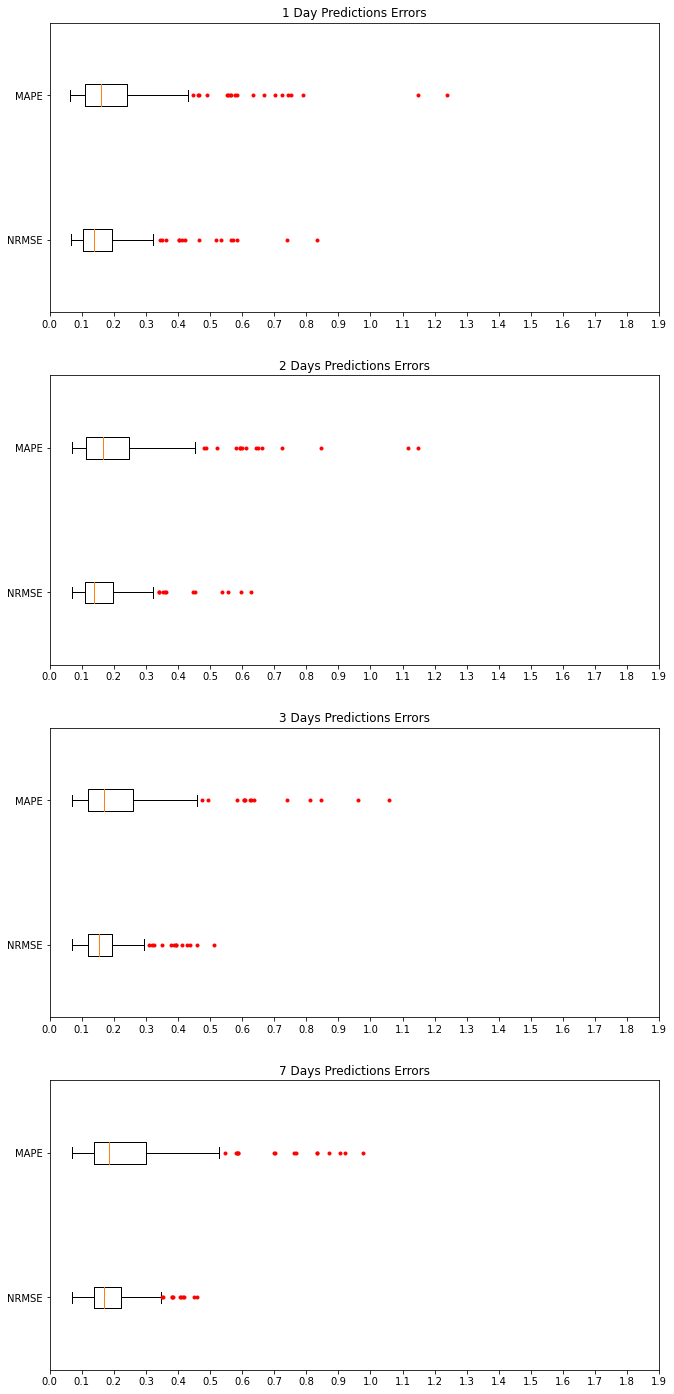

In [74]:
fig,ax= plt.subplots(4,1,figsize = (10,20))



ax[0].boxplot(day_errors[["NRMSE", "MAPE"]], vert = False, sym = "r.");
ax[0].set_title("1 Day Predictions Errors")
ax[0].set_yticklabels(["NRMSE", "MAPE"])
ax[0].set_xticks(np.arange(0,2,0.1))
day_desc1 = day_errors["NRMSE"].describe()
print("===========================1 Day NRMSE=======================================")

print("Day NRMSE Errors 25%: {}, 50%: {}, 75%: {}".format(day_desc1["25%"], day_desc1["50%"], day_desc1["75%"]))

day_desc2 = day_errors["MAPE"].describe()
print("===========================1 Day MAPE===========================================")
print("Day MAPE Errors 25%: {}, 50%: {}, 75%: {}".format(day_desc2["25%"], day_desc2["50%"], day_desc2["75%"]))
print("================================================================================= \n")



ax[1].boxplot(day2_errors[["NRMSE", "MAPE"]], vert = False, sym = "r.");
ax[1].set_title("2 Days Predictions Errors")
ax[1].set_yticklabels(["NRMSE", "MAPE"])
ax[1].set_xticks(np.arange(0,2,0.1))
day_desc1 = day2_errors["NRMSE"].describe()
print("==============================2 Days NRMSE====================================")

print("Day NRMSE Errors 25%: {}, 50%: {}, 75%: {}".format(day_desc1["25%"], day_desc1["50%"], day_desc1["75%"]))

day_desc2 = day2_errors["MAPE"].describe()
print("==============================2 Days MAPE=======================================")
print("Day MAPE Errors 25%: {}, 50%: {}, 75%: {}".format(day_desc2["25%"], day_desc2["50%"], day_desc2["75%"]))

print("================================================================================= \n")

ax[2].boxplot(day3_errors[["NRMSE", "MAPE"]], vert = False, sym = "r.");
ax[2].set_title("3 Days Predictions Errors")
ax[2].set_yticklabels(["NRMSE", "MAPE"])
ax[2].set_xticks(np.arange(0,2,0.1))
day_desc1 = day3_errors["NRMSE"].describe()
print("=============================3 Days NRMSE======================================")

print("Day NRMSE Errors 25%: {}, 50%: {}, 75%: {}".format(day_desc1["25%"], day_desc1["50%"], day_desc1["75%"]))

day_desc2 = day3_errors["MAPE"].describe()
print("=============================3 Days MAPE========================================")
print("Day MAPE Errors 25%: {}, 50%: {}, 75%: {}".format(day_desc2["25%"], day_desc2["50%"], day_desc2["75%"]))

print("================================================================================= \n")

ax[3].boxplot(day7_errors[["NRMSE", "MAPE"]], vert = False, sym = "r.");
ax[3].set_title("7 Days Predictions Errors")
ax[3].set_yticklabels(["NRMSE", "MAPE"])
ax[3].set_xticks(np.arange(0,2,0.1))
day_desc1 = day7_errors["NRMSE"].describe()
print("===============================7 Days NRMSE====================================")

print("Day NRMSE Errors 25%: {}, 50%: {}, 75%: {}".format(day_desc1["25%"], day_desc1["50%"], day_desc1["75%"]))

day_desc2 = day7_errors["MAPE"].describe()
print("Day MAPE Errors 25%: {}, 50%: {}, 75%: {}".format(day_desc2["25%"], day_desc2["50%"], day_desc2["75%"]))
print("==============================7 Days NRMSE=======================================")




fig.tight_layout(pad=3.0)


plt.show()

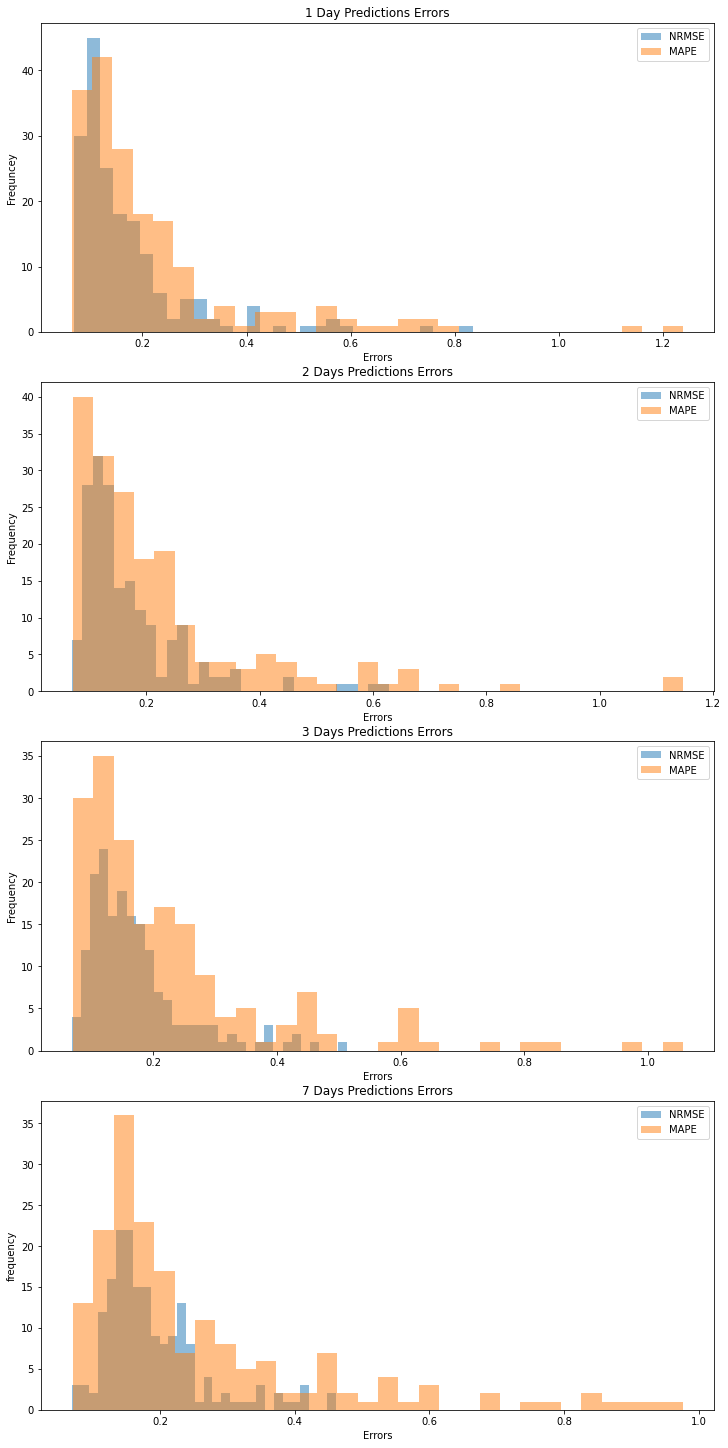

In [98]:
fig2,ax2= plt.subplots(4,1,figsize = (10,20))

ax2[0].hist(day_errors["NRMSE"], bins = 30,alpha = 0.5,  label="NRMSE");
ax2[0].hist(day_errors["MAPE"], bins = 30,alpha = 0.5,  label="MAPE");
ax2[0].set_title("1 Day Predictions Errors")
ax2[0].set_xlabel("Errors")
ax2[0].set_ylabel("Frequncey")
handles, labels = ax2[0].get_legend_handles_labels()
ax2[0].legend(handles, labels)

ax2[1].hist(day2_errors[["NRMSE"]], bins = 30,alpha = 0.5,  label="NRMSE");
ax2[1].hist(day2_errors[["MAPE"]], bins = 30,alpha = 0.5,  label="MAPE");
ax2[1].set_title("2 Days Predictions Errors")
ax2[1].set_xlabel("Errors")
ax2[1].set_ylabel("Frequency")
handles, labels = ax2[1].get_legend_handles_labels()
ax2[1].legend(handles, labels)


ax2[2].hist(day3_errors[["NRMSE"]], bins = 30,alpha = 0.5,  label="NRMSE");
ax2[2].hist(day3_errors[["MAPE"]], bins = 30,alpha = 0.5,  label="MAPE");
ax2[2].set_title("3 Days Predictions Errors")
ax2[2].set_xlabel("Errors")
ax2[2].set_ylabel("Frequency")
handles, labels = ax2[2].get_legend_handles_labels()
ax2[2].legend(handles, labels)

ax2[3].hist(day7_errors[["NRMSE"]], bins = 30,alpha = 0.5,  label="NRMSE");
ax2[3].hist(day7_errors[["MAPE"]], bins = 30,alpha = 0.5,  label="MAPE");
ax2[3].set_title("7 Days Predictions Errors")
ax2[3].set_xlabel("Errors")
ax2[3].set_ylabel("frequency")
handles, labels = ax2[3].get_legend_handles_labels()
ax2[3].legend(handles, labels)

plt.tight_layout(pad = 0.3)

- The errors here have a small standard deviation compared to other model
- errors distribution medial is almost arrounf 15-30% increasing with prediction error
- MAPE Error has a wider whiskers because on its formula we dicide by the real value and this value is chaging every point so the error maybe a alge portio of it, but NRMSE Is divided by the mean value.

### Notes in Prophet predictions:
- Prophet is a great tool to capture the seasonalities that can be found on any data.
- it's a good thing to use for univariate or when you don't have a lot of objects to pridict its values.